In [23]:
# Importing pandas library
import pandas as pd

# Replace the file path with the location where you've uploaded the CSV file
file_path = 'modified_tbl_user_activity_data(2).csv'

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,id,user_id,user_uid,product_title,product_breadcrumb,product_url,created_at,updated_at,popularity_score,popularity_tag,category,named_entities,keywords
0,19,1,NaN,"Crucial CT2000P3SSD8 2000 GB Desktop, Laptop I...",NaN,https://lannister.deals2buy.in/deal_detail?tit...,2024-03-02 12:23:55,2024-03-02 12:23:55,0.533333,High,Electronics,"[Tree('PERSON', [('Laptop', 'NNP'), ('Internal...","['Crucial', 'CT2000P3SSD8', 'GB', 'Desktop', '..."
1,20,78,NaN,"realme 9i 5G (Rocking Black, 64 GB) (4 GB RAM)",NaN,https://lannister.deals2buy.in/deal_detail?tit...,2024-03-03 23:37:54,2024-03-03 23:37:54,1.000000,High,Other,"[Tree('PERSON', [('Black', 'NNP')])]","['realme', 'Black', 'GB', 'GB', 'RAM']"
2,21,78,NaN,"realme 9i 5G (Rocking Black, 64 GB) (4 GB RAM)",NaN,https://lannister.deals2buy.in/deal_detail?tit...,2024-03-03 23:37:54,2024-03-03 23:37:54,1.000000,High,Other,"[Tree('PERSON', [('Black', 'NNP')])]","['realme', 'Black', 'GB', 'GB', 'RAM']"
3,22,1,NaN,"realme 9i 5G (Rocking Black, 64 GB) (4 GB RAM)",NaN,https://lannister.deals2buy.in/deal_detail?tit...,2024-03-04 19:24:41,2024-03-04 19:24:41,1.000000,High,Other,"[Tree('PERSON', [('Black', 'NNP')])]","['realme', 'Black', 'GB', 'GB', 'RAM']"
4,23,1,NaN,Myntra : Men Branded Trousers From Rs.499,NaN,https://lannister.deals2buy.in/deal_detail?tit...,2024-03-04 19:24:41,2024-03-04 19:24:41,0.266667,High,Other,[],"['Myntra', 'Men', 'Trousers', 'Rs.499']"


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the first few rows of the dataframe
print(df.head())

# Check data types and missing values
print(df.info())

# Descriptive statistics
print(df.describe())

Empty DataFrame
Columns: [id, user_id, user_uid, product_title, product_breadcrumb, product_url, created_at, updated_at, popularity_score, popularity_tag, category, named_entities, keywords]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  0 non-null      int64  
 1   user_id             0 non-null      int64  
 2   user_uid            0 non-null      float64
 3   product_title       0 non-null      object 
 4   product_breadcrumb  0 non-null      object 
 5   product_url         0 non-null      object 
 6   created_at          0 non-null      object 
 7   updated_at          0 non-null      object 
 8   popularity_score    0 non-null      float64
 9   popularity_tag      0 non-null      object 
 10  category            0 non-null      object 
 11  named_entities      0 non-null      object 
 12  keywords            

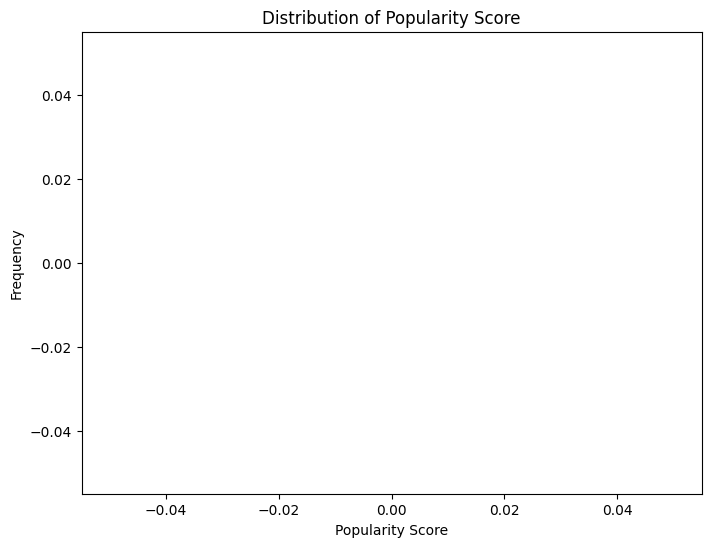

In [25]:
# Distribution of 'popularity_score'
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity_score'], bins=20, kde=True)
plt.title('Distribution of Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

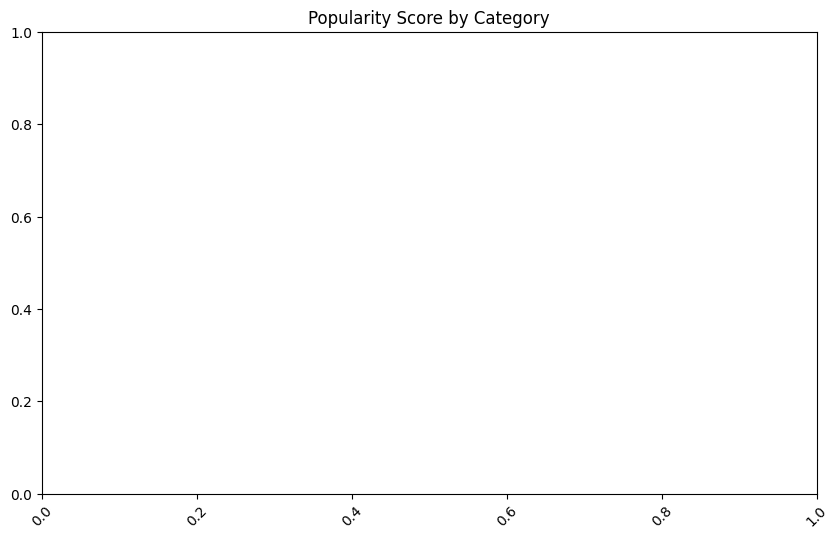

In [26]:
# Relationship between 'popularity_score' and 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='popularity_score', data=df)
plt.title('Popularity Score by Category')
plt.xticks(rotation=45)
plt.show()

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(data, user_id, search_input, n=5):
    # Filter data based on user ID
    user_data = data[data['user_id'] == user_id]

    # Combine product title and product breadcrumb into a single text column
    user_data['product_text'] = user_data['product_title'] + ' ' + user_data['product_breadcrumb']

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(user_data['product_text'].values.astype('U'))

    # Calculate similarity scores
    search_vec = tfidf_vectorizer.transform([search_input])
    similarity_scores = cosine_similarity(search_vec, tfidf_matrix)

    # Get indices of top n similar products
    top_indices = similarity_scores.argsort()[:, ::-1][:, :n]

    # Get recommended products
    recommended_products = user_data.iloc[top_indices[0]]

    return recommended_products[['product_title', 'product_breadcrumb', 'product_url']]

# Example usage
# Assuming `data` is your DataFrame containing the product data
user_id = 1
search_input = "realme 9i 5G"
recommendations = recommend_products(data, user_id, search_input)
print(recommendations)


                                       product_title product_breadcrumb  \
5     realme 9i 5G (Rocking Black, 64 GB) (4 GB RAM)                NaN   
4          Myntra : Men Branded Trousers From Rs.499                NaN   
3     realme 9i 5G (Rocking Black, 64 GB) (4 GB RAM)                NaN   
0  Crucial CT2000P3SSD8 2000 GB Desktop, Laptop I...                NaN   

                                         product_url  
5  https://lannister.deals2buy.in/deal_detail?tit...  
4  https://lannister.deals2buy.in/deal_detail?tit...  
3  https://lannister.deals2buy.in/deal_detail?tit...  
0  https://lannister.deals2buy.in/deal_detail?tit...  


<ipython-input-27-fdb2db103e41>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['product_text'] = user_data['product_title'] + ' ' + user_data['product_breadcrumb']
